In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### read dfnames

In [51]:
dfnames = pd.read_csv('constituents.csv')
dfnames[:5]

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [52]:
dfnames.shape

(460, 3)

### read dfprices

In [53]:
dfprices = pd.read_csv('prices.csv')
dfprices.shape

(355, 461)

In [54]:
dfprices.iloc[:4,:4]

,Date,MMM,AOS,ABT
0,2019-01-02,181.270157,42.208401,67.791504
1,2019-01-03,174.444626,41.188873,64.592140
2,2019-01-04,181.621399,42.839535,66.435669
3,2019-01-07,181.203720,43.606602,67.430595


In [55]:
# earliest and latest Date

In [56]:
dfprices.Date.min(),dfprices.Date.max()

('2019-01-02', '2020-05-29')

In [57]:
# Let Date be the index of dfprices

In [58]:
dfprices.set_index('Date',inplace=True)
dfprices.iloc[:4,:4]

,MMM,AOS,ABT,ABBV
Date,,,,
2019-01-02,181.270157,42.208401,67.791504,80.913643
2019-01-03,174.444626,41.188873,64.592140,78.247650
2019-01-04,181.621399,42.839535,66.435669,80.768547
2019-01-07,181.203720,43.606602,67.430595,81.947380


In [59]:
dfprices.shape

(355, 460)

### 1) Number of companies in each sector

In [60]:
dfnames['Sector'].value_counts()

Consumer Discretionary        75
Information Technology        64
Financials                    62
Industrials                   61
Health Care                   56
Consumer Staples              32
Real Estate                   29
Energy                        28
Utilities                     28
Materials                     22
Telecommunication Services     3
Name: Sector, dtype: int64

### 2) Correlation Matrix

In [61]:
# Find net returns

In [62]:
net_returns = dfprices / dfprices.shift(1) - 1

In [63]:
corrs = net_returns.corr()
corrs.iloc[:5,:5]

,MMM,AOS,ABT,ABBV,ACN
MMM,1.000000,0.594449,0.576961,0.452514,0.635089
AOS,0.594449,1.000000,0.453195,0.343838,0.514166
ABT,0.576961,0.453195,1.000000,0.568671,0.696058
ABBV,0.452514,0.343838,0.568671,1.000000,0.563359
ACN,0.635089,0.514166,0.696058,0.563359,1.000000


In [64]:
corrs.shape

(460, 460)

### 3. Companies with smallest correlation

In [65]:
mincorr = corrs.values.min()
mincorr

-0.17560613592975668

In [66]:
# find the stocks leading to mincorr

In [67]:
np.where(corrs == mincorr)

(array([179, 238]), array([238, 179]))

In [68]:
# display their names

In [69]:
corrs.columns[179],corrs.columns[238]

('FLR', 'SJM')

In [70]:
dfnames[(dfnames['Symbol'] == 'FLR') | (dfnames['Symbol'] == 'SJM')]

,Symbol,Name,Sector
179,FLR,Fluor Corp.,Industrials
238,SJM,JM Smucker,Consumer Staples


In [71]:
# Scatterplot of their net returns

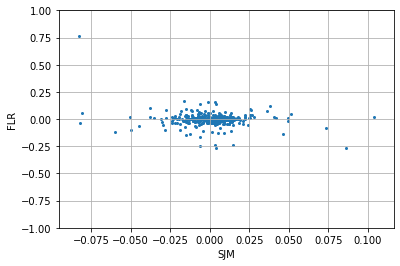

In [72]:
plt.scatter(net_returns['SJM'], net_returns['FLR'],s=4) 
plt.ylim(-1,1)
plt.xlabel('SJM')
plt.ylabel('FLR')
plt.grid()

In [73]:
# Comment (not required): no trend in the scatterplot if low correlation

### 4. Random sample of 8 companies

In [74]:
df = dfnames.sample(n=8,random_state=1)
df

,Symbol,Name,Sector
67,BA,Boeing Company,Industrials
146,ETN,Eaton Corporation,Industrials
324,PKG,Packaging Corporation of America,Materials
437,VMC,Vulcan Materials,Materials
224,INCY,Incyte,Health Care
283,MGM,MGM Resorts International,Consumer Discretionary
383,SNA,Snap-On Inc.,Consumer Discretionary
289,TAP,Molson Coors Brewing Company,Consumer Staples


### 5. Plot their stock prices

In [75]:
# select these companies from dfprices

In [76]:
Symbol = df['Symbol']
list3 = list(Symbol)
list3

['BA', 'ETN', 'PKG', 'VMC', 'INCY', 'MGM', 'SNA', 'TAP']

In [77]:
dfprices8 = dfprices[list3]
dfprices8[:5]

,BA,ETN,PKG,VMC,INCY,MGM,SNA,TAP
Date,,,,,,,,
2019-01-02,314.645142,39.129158,80.590820,96.088844,63.560001,24.545595,141.698990,54.407227
2019-01-03,302.100555,37.999931,79.008545,95.104233,68.059998,24.068127,139.777145,55.150570
2019-01-04,317.822601,39.083527,82.134964,99.968254,72.269997,25.110756,144.879669,56.904106
2019-01-07,318.823395,39.197590,82.945152,101.957176,74.209999,25.831825,146.734268,56.780216
2019-01-08,330.891937,38.883915,85.080261,101.553482,74.900002,26.513918,148.608078,58.295494


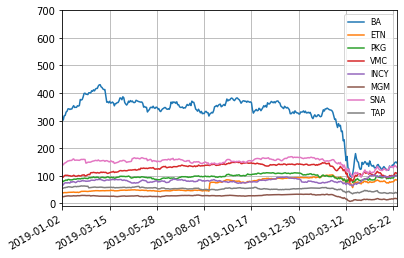

In [78]:
dfprices8.plot(grid=True)
plt.ylim(-10,700)
plt.legend(loc=1, prop={'size': 8})
plt.gcf().autofmt_xdate() # Rotate x-labels
plt.xlabel('');

### 6. Riskiest stock

In [79]:
# Find net returns then its standard deviation

In [80]:
net_returns8 = net_returns[list3]
net_returns8[:5]

,BA,ETN,PKG,VMC,INCY,MGM,SNA,TAP
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.039869,-0.028859,-0.019633,-0.010247,0.070799,-0.019452,-0.013563,0.013663
2019-01-04,0.052042,0.028516,0.039571,0.051144,0.061857,0.043320,0.036505,0.031795
2019-01-07,0.003149,0.002918,0.009864,0.019896,0.026844,0.028716,0.012801,-0.002177
2019-01-08,0.037853,-0.008002,0.025741,-0.003959,0.009298,0.026405,0.012770,0.026687


In [81]:
net_returns8.std()

BA      0.041064
ETN     0.045241
PKG     0.024042
VMC     0.026407
INCY    0.023205
MGM     0.045427
SNA     0.025258
TAP     0.023486
dtype: float64

In [82]:
# MGM has the largest std deviation

In [83]:
dfnames[(dfnames['Symbol'] == 'MGM')]

,Symbol,Name,Sector
283,MGM,MGM Resorts International,Consumer Discretionary


### 7. Plot the stock cumulative gross returns

In [84]:
# Find cumulative gross returns

In [85]:
gross_returns8 = net_returns8 + 1
cum_gross_returns8 = gross_returns8.cumprod()
cum_gross_returns8[:5]

,BA,ETN,PKG,VMC,INCY,MGM,SNA,TAP
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.960131,0.971141,0.980367,0.989753,1.070799,0.980548,0.986437,1.013663
2019-01-04,1.010099,0.998834,1.019160,1.040373,1.137036,1.023025,1.022447,1.045892
2019-01-07,1.013279,1.001749,1.029213,1.061072,1.167558,1.052402,1.035535,1.043615
2019-01-08,1.051635,0.993732,1.055707,1.056871,1.178414,1.080190,1.048759,1.071466


In [86]:
cum_gross_returns8[-5:]

,BA,ETN,PKG,VMC,INCY,MGM,SNA,TAP
Date,,,,,,,,
2020-05-22,0.437096,2.010521,1.144564,1.039038,1.563405,0.647692,0.909534,0.676932
2020-05-26,0.459978,2.093579,1.210661,1.089929,1.552549,0.718979,0.966838,0.675094
2020-05-27,0.475202,2.205005,1.261126,1.160489,1.545312,0.737717,0.961263,0.730418
2020-05-28,0.476155,2.175615,1.251771,1.148625,1.581970,0.701870,0.943902,0.704870
2020-05-29,0.463538,2.169738,1.248202,1.127290,1.603367,0.699834,0.915250,0.697701


In [87]:
cum_gross_returns8.shape

(355, 8)

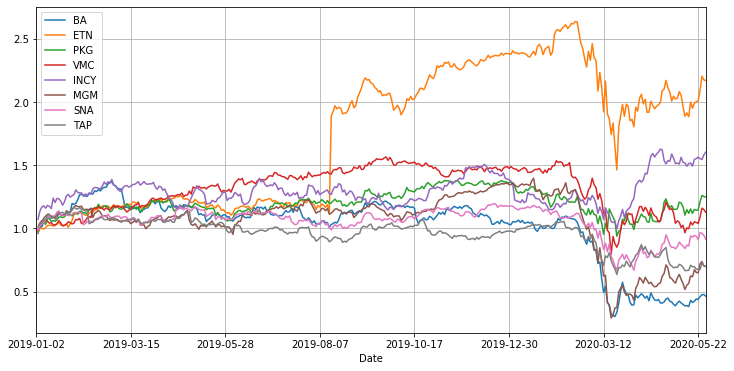

In [88]:
cum_gross_returns8.plot(figsize=(12,6),grid=True);

In [89]:
# Stock with the largest price increase was ETN 

### 8. Stock with the largest average return

In [90]:
# first find the log of gross returns

In [91]:
log_gross_returns8 = np.log(gross_returns8)
log_gross_returns8[:5]

,BA,ETN,PKG,VMC,INCY,MGM,SNA,TAP
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.040686,-0.029284,-0.019829,-0.010300,0.068405,-0.019644,-0.013656,0.013570
2019-01-04,0.050733,0.028117,0.038808,0.049879,0.060019,0.042408,0.035854,0.031300
2019-01-07,0.003144,0.002914,0.009816,0.019700,0.026490,0.028311,0.012720,-0.002180
2019-01-08,0.037155,-0.008035,0.025415,-0.003967,0.009255,0.026063,0.012689,0.026337


In [92]:
# Then find the average log gross return for each stock

In [93]:
avg_log_gross_ret = log_gross_returns8.mean()
avg_log_gross_ret

BA     -0.002172
ETN     0.002188
PKG     0.000626
VMC     0.000338
INCY    0.001334
MGM    -0.001008
SNA    -0.000250
TAP    -0.001017
dtype: float64

In [94]:
# Finally exponentiate that average

In [95]:
avg_gross_returns = np.exp(avg_log_gross_ret)
avg_gross_returns

BA      0.997830
ETN     1.002191
PKG     1.000626
VMC     1.000339
INCY    1.001335
MGM     0.998992
SNA     0.999750
TAP     0.998984
dtype: float64

In [96]:
# Conclusion: ETN had the largest daily average return